Questão 19

In [25]:
import spacy
import re
from spacy.lang.en.stop_words import STOP_WORDS

In [26]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("stopwords")

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [27]:
nlp = spacy.load("en_core_web_sm")

In [28]:
pattern = r'[a-zA-Zà-úÀ-Ú-Z]{1,}'
regex = re.compile(pattern)

In [29]:
def preprocess(text):
    #br, s e t no nosso dataset são stopwords então removeremos elas
    STOP_WORDS.add("br")
    STOP_WORDS.add("s")
    STOP_WORDS.add("t")
    palavra_final = " ".join(regex.findall(text))
    doc = nlp(palavra_final)
    no_stop_words = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(no_stop_words)

In [30]:
text="The sun rises in the east. /><br@#!>"
preprocess(text)

'sun rises east'

In [31]:
def generate_N_grams(text,ngram=1):
    words=[word for word in preprocess(text).split(" ")]
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

In [32]:
text=["The sun rises in the east. @#!></"]
for element in text:
    print(generate_N_grams(element,2))


['sun rises', 'rises east']


questão 20

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
v = CountVectorizer(ngram_range=(2, 2))
v.fit(["The sun rises in the east"])
v.vocabulary_

{'the sun': 4, 'sun rises': 2, 'rises in': 1, 'in the': 0, 'the east': 3}

questão 21

In [35]:
import pandas as pd

In [36]:
data = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [37]:
data.drop("sentiment",axis=1,inplace=True)

In [38]:
data_modified=data.iloc[0:100]
data_modified

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...
95,Daniel Day-Lewis is the most versatile actor a...
96,My guess would be this was originally going to...
97,"Well, I like to watch bad horror B-Movies, cau..."
98,"This IS the worst movie I have ever seen, as w..."


In [39]:
v = CountVectorizer(ngram_range=(1, 1))
v.fit(data_modified["review"].tolist())
v.vocabulary_

{'one': 2924,
 'of': 2898,
 'the': 4189,
 'other': 2953,
 'reviewers': 3501,
 'has': 1882,
 'mentioned': 2623,
 'that': 4186,
 'after': 134,
 'watching': 4578,
 'just': 2268,
 'oz': 2984,
 'episode': 1384,
 'you': 4736,
 'll': 2456,
 'be': 402,
 'hooked': 1989,
 'they': 4205,
 'are': 271,
 'right': 3520,
 'as': 297,
 'this': 4215,
 'is': 2199,
 'exactly': 1421,
 'what': 4611,
 'happened': 1867,
 'with': 4657,
 'me': 2592,
 'br': 545,
 'first': 1576,
 'thing': 4208,
 'struck': 4013,
 'about': 59,
 'was': 4570,
 'its': 2210,
 'brutality': 588,
 'and': 218,
 'unflinching': 4411,
 'scenes': 3629,
 'violence': 4518,
 'which': 4621,
 'set': 3704,
 'in': 2089,
 'from': 1662,
 'word': 4679,
 'go': 1755,
 'trust': 4355,
 'not': 2856,
 'show': 3757,
 'for': 1618,
 'faint': 1487,
 'hearted': 1907,
 'or': 2939,
 'timid': 4254,
 'pulls': 3273,
 'no': 2835,
 'punches': 3276,
 'regards': 3398,
 'to': 4262,
 'drugs': 1255,
 'sex': 3711,
 'hardcore': 1874,
 'classic': 768,
 'use': 4460,
 'it': 2206,
 '

In [40]:
n_grams_list= []
for element in data_modified['review']:
    n_grams_list += generate_N_grams(element,1)

In [41]:
n_grams_list

['reviewers',
 'mentioned',
 'watching',
 'Oz',
 'episode',
 'll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'thing',
 'struck',
 'Oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'Trust',
 'faint',
 'hearted',
 'timid',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'OZ',
 'nickname',
 'given',
 'Oswald',
 'Maximum',
 'Security',
 'State',
 'Penitentary',
 'focuses',
 'mainly',
 'Emerald',
 'City',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'Em',
 'City',
 'home',
 'Aryans',
 'Muslims',
 'gangstas',
 'Latinos',
 'Christians',
 'Italians',
 'Irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'far',
 'away',
 'main',
 'appeal',
 'fact',
 'goes',
 'shows',
 'wouldn',
 'dare',
 'Forget',
 'pretty',
 'pictures',
 'painted',
 'mainstream',
 'audiences',
 'fo

questão 22

In [42]:
import matplotlib.pyplot as plt

In [43]:
def Zipf_curve(dataset,limiter=15):
    word2count = {}
    for data in dataset:
        words = nltk.word_tokenize(data)
        for word in words:
            if word not in word2count.keys():
                word2count[word] = 1
            else:
                word2count[word] += 1
    sorted_words = sorted(word2count.items(), key=lambda kv: kv[1], reverse=True)
    sorted_words = sorted_words[0:limiter]
    freq = []
    labels = []
    for i in sorted_words:
        freq.append(i[1])
        labels.append(i[0])
    fig, ax = plt.subplots()
    ax.plot(labels, freq)
    ax.set(xlabel='Words', ylabel='Frequency',
           title='Zipf curve')
    ax.grid()
    plt.show()

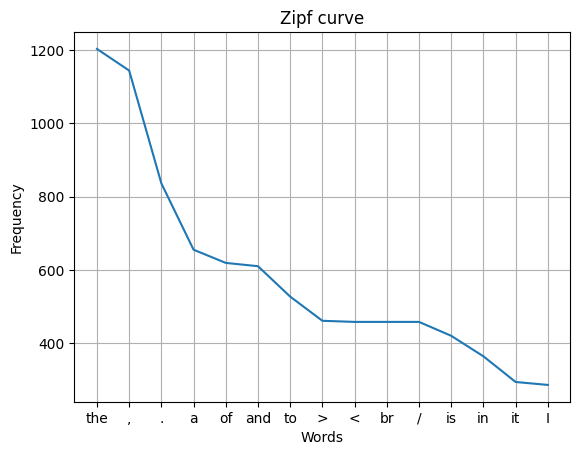

In [44]:
Zipf_curve(data_modified["review"])

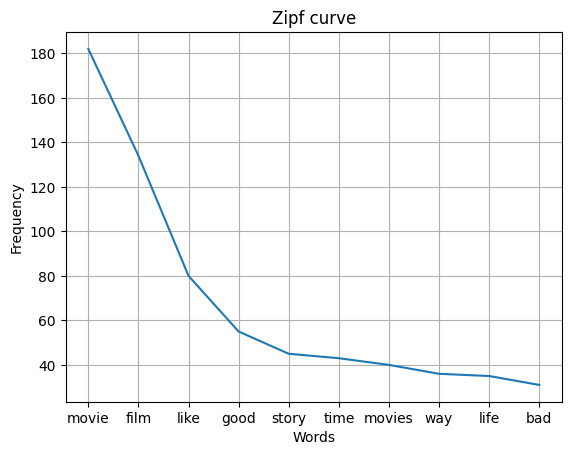

In [45]:
Zipf_curve(n_grams_list,10)

questão 23

Sim deveriamos cortar as stopwords da nossa bag of words pois a nossa curva zipf apenas retornou stopwords e não nos retornou palavras realmente relevantes

questão 24

In [46]:
for element in data_modified['review']:
    n_grams_list += generate_N_grams(element,2)

In [47]:
for element in data_modified['review']:
    n_grams_list += generate_N_grams(element,3)

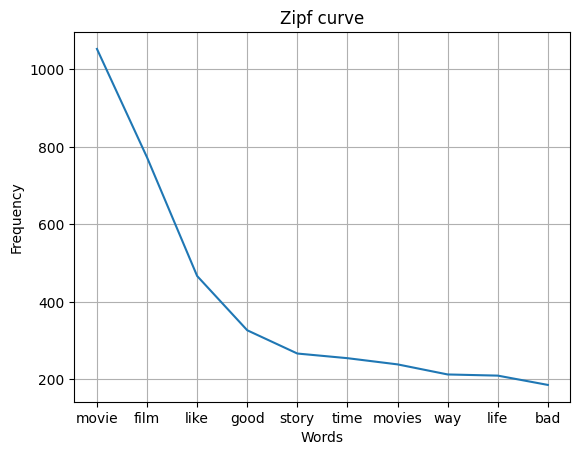

In [48]:
Zipf_curve(n_grams_list,10)